### 1. <u>Problem Statement</u>
Building a Model that will detect and classify whether the incoming messages (SMS) are SPAM or, NOT SPAM.

In [228]:
#Importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_is_fitted

### 2. Data Collection

In [229]:
#Loading the data into dataframe
df = pd.read_csv("spam.csv", encoding="Windows-1252")

The csv file contains characters that are not valid UTF-8 sequences. It has Windows-1252 character encoding.

In [230]:
#Checking the dataframe
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1402,ham,You have registered Sinco as Payee. Log in at ...,NaN,NaN,NaN
2723,ham,"Tunde, how are you doing. This is just wishing...",NaN,NaN,NaN
5093,ham,Gokila is talking with you aha:),NaN,NaN,NaN
3716,ham,I'm gonna rip out my uterus.,NaN,NaN,NaN
1741,ham,I can do that! I want to please you both insid...,NaN,NaN,NaN


In [231]:
#Checking shape of the dataframe
df.shape

(5572, 5)

There are 5572 rows and 5 columns.

### 3. Data Cleaning

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Column v1 and v2 has 5572 non-null values; however, remaining three columns have got insignificant number of non-null values. 
So, we will drop those three columns from the dataset.

In [233]:
#Dropping last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [234]:
df.sample(5)

,v1,v2
1805,ham,God bless.get good sleep my dear...i will pray!
2479,spam,Sppok up ur mob with a Halloween collection of...
874,ham,Talk With Yourself Atleast Once In A Day...!!!...
1813,ham,Yes we are chatting too.
3326,ham,what number do u live at? Is it 11?


The three columns have been dropped.

In [235]:
#Renaming column names
df.rename(columns={'v1' : 'category', 'v2' : 'text_message'}, inplace=True)

In [236]:
df.sample(5)

,category,text_message
2529,ham,Can you just come in for a sec? There's somebo...
3708,ham,Ok.ok ok..then..whats ur todays plan
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."
4167,spam,Congrats! Nokia 3650 video camera phone is you...
4484,ham,What not under standing.


Columns have been renamed.

In [237]:
#Checking unique values in the category column
df['category'].unique()

array(['ham', 'spam'], dtype=object)

There are only two unique values present in the column.

##### >Label Encoding

In [238]:
df.head(5)

,category,text_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [239]:
#Label encoding the category column as the categorical values in the column have no specific order & the number of unique categories is low.
from sklearn.preprocessing import LabelEncoder

#Initialize label encoder
label = LabelEncoder()

#Fit transform the category column. fit in fit_transform() will learn the unique categories in the column and assigns them integer labels.
#transform will replace each category in the column with its corresponding integer.
df['category'] = label.fit_transform(df['category'])

In [240]:
df.head(5)

,category,text_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


'ham' has been assigned the value of 0 and 'spam' has been assigned the value of 1.

##### >Check for missing values

In [241]:
df.isnull().sum()

category        0
text_message    0
dtype: int64

No missing values present.

##### >Check for duplicate values

In [242]:
df.duplicated().sum()

403

There are 403 duplicate values present.

In [243]:
#Dropping the duplicate records
df.drop_duplicates(inplace=True)

In [244]:
df.duplicated().sum()

0

Duplicate records dropped.

In [245]:
#Re-checking dataframe shape
df.shape

(5169, 2)

The dataframe has now 5169 rows after data cleaning.

### 4. EDA

In [246]:
df.head()

,category,text_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [247]:
#Checking percentage of data that is spam and ham
df['category'].value_counts(normalize=True)

category
0    0.87367
1    0.12633
Name: proportion, dtype: float64

87% data is ham and 12.6% data is spam.

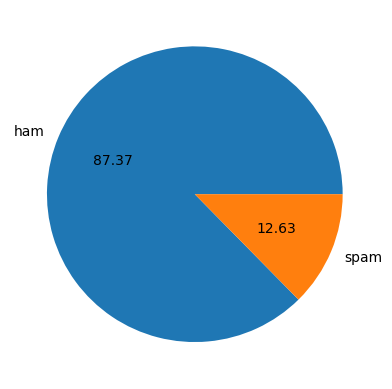

In [248]:
#Checking the distribution using pie chart
plt.pie(df['category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

As it is evident that the Data is Imbalanced.

##### Now we will analyze the sms messages based on number of characters, words and sentences present in the text messages. We will also create three columns holding respective values. To do this analysis, we will use nltk library (Natural Language Processing Library).

In [249]:
#Installing nltk library
#!pip install nltk

In [250]:
#Importing nltk library
import nltk

In [251]:
#Downloading the Punkt Tokenizer Models, which are essential for sentence and word tokenization. Once downloaded, punkt_tab can be used for tokenizing sentences or words.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nehau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [252]:
#Fetching number of characters in each text message and storing in a new column
df['char_count'] = df['text_message'].apply(len)

In [253]:
df.head()

,category,text_message,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [254]:
#Fetching number of words in each text message and storing in a new column
df['word_count'] = df['text_message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [255]:
df.head()

,category,text_message,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [256]:
##Fetching number of sentences in each text message and storing in a new column
df['sentence_count'] = df['text_message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [257]:
df.head()

,category,text_message,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [258]:
#Describing the columns to get insight into the text messages.
df.describe()

,category,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


- The average number of characters in a text message is 79, number of words is 18 and number of sentences is 2 approx.
- There is a text message that has 2 characters, 1 word and 1 sentence.
- 50% of the text messages have 60 characters, 15 words and 1 sentence.
- There is an SMS with 910 characters, 220 words and 38 sentences.
- The mean is right skewed due to the presence of outlier.

In [259]:
#Describing the data based on ham and spam messages. ham=0, spam=1
#For ham messages
df[df['category']==0].describe()

,category,char_count,word_count,sentence_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


##### Describing 'ham' category messages
- The average number of characters in a text message is 70, number of words is 17 and number of sentences is 2 approx.
- There is a text message that has 2 characters, 1 word and 1 sentence.(Minimum)
- 50% of the text messages have 52 characters, 13 words and 1 sentence.
- There is an SMS with 910 characters, 220 words and 38 sentences.

In [260]:
#For spam messages
df[df['category']==1].describe()

,category,char_count,word_count,sentence_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


##### Describing 'spam' category messages
- The average number of characters in a text message is 137, number of words is 27 and number of sentences is 3 approx.
- There is a text message that has 13 characters, 2 word and 1 sentence.(Minimum)
- 50% of the text messages have 149 characters, 29 words and 3 sentences.
- There is an SMS with 224 characters, 46 words and 9 sentences.

##### Plotting using histogram to understand the distribution of number of characters for both category types messages

In [261]:
#Importing seaborn
import seaborn as sns

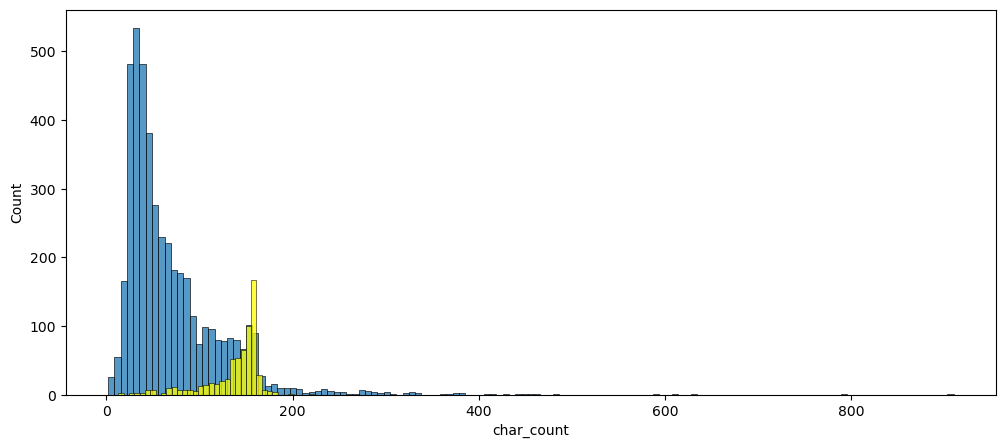

In [262]:
plt.figure(figsize=(12,5))
#Plot for ham
sns.histplot(df[df['category']==0]['char_count'])
#Plot for spam
sns.histplot(df[df['category']==1]['char_count'], color='yellow')
plt.show()

- We can see that majority of the spam messages have more number of characters and thus are bigger than the ham messages.

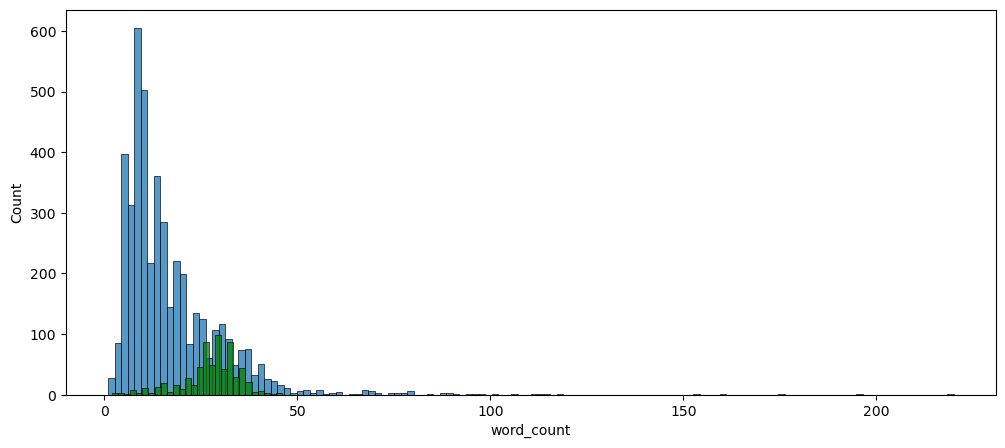

In [263]:
#Plotting using histogram to understand the distribution of number of words for both category types messages
plt.figure(figsize=(12,5))
#Plot for ham
sns.histplot(df[df['category']==0]['word_count'])
#Plot for spam
sns.histplot(df[df['category']==1]['word_count'], color='green')
plt.show()

- We can see that majority of the spam messages have more number of words than the ham messages.
- We can also see that there are some outliers present in the ham messages.

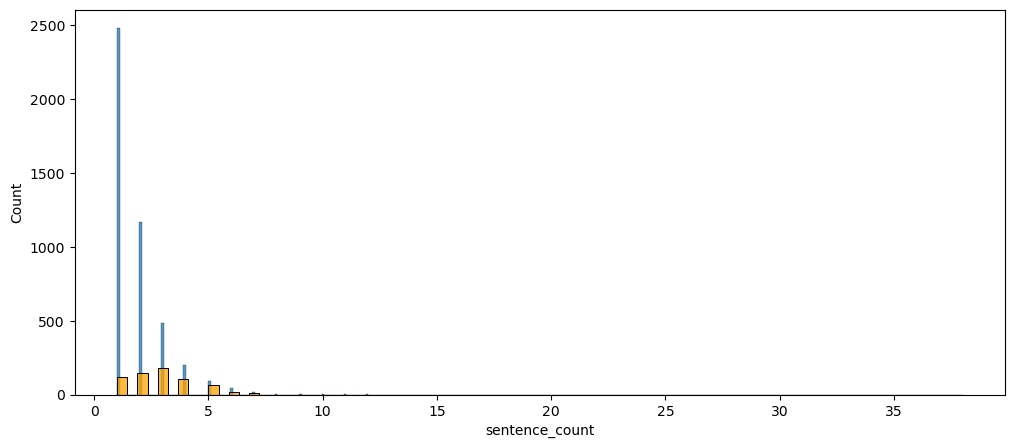

In [264]:
#Plotting using histogram to understand the distribution of number of sentences for both category types messages
plt.figure(figsize=(12,5))
#Plot for ham
sns.histplot(df[df['category']==0]['sentence_count'])
#Plot for spam
sns.histplot(df[df['category']==1]['sentence_count'], color='orange')
plt.show()

##### Checking correlation between the numerical columns

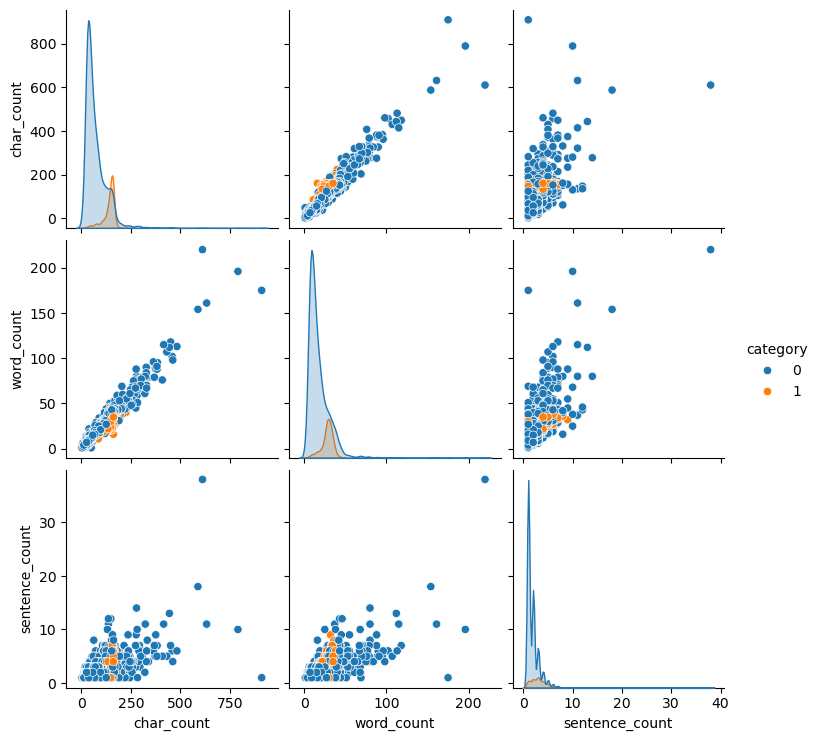

In [265]:
#Using 'hue' to color the points based on category column.
sns.pairplot(df, hue='category')
plt.show()

- There are outliers in the data for ham category messages.

##### Visualizing correlation matrix using heatmap

<Axes: >

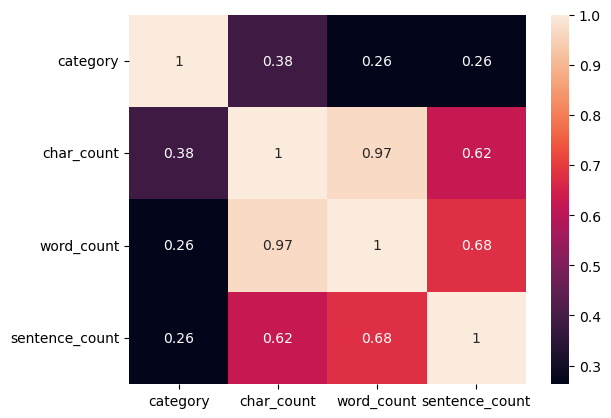

In [266]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

- There is a very strong positive correlation between char_count and word_count.
- sentence_count is also positively correlated with char_count and word_count.
- category(0 or, 1) is showing more positive correlation on char_count.
- On observing the relationships, we can say that there is multicollinearity in the data (correlation >= 0.7 ). So, we will pick only 'char_count' for model building as it is showing more positive correlation than others.

#### 5. Data Preprocessing

Data Preprocessing to be performed for text based data are as below -
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words
- Removing punctuations
- Stemming (Replacing different similar type words as root word. Ex: Replacing run, ran, running as Run)

##### Creating a function that will handle all the data preprocessing tasks mentioned above

In [267]:
#Downloading stopwords corpus from the NLTK
#nltk.download('stopwords')

In [268]:
#Checking list of stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [269]:
#Checking puntuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [270]:
#Importing module for stemming
from nltk.stem.porter import PorterStemmer
#creating the object
ps = PorterStemmer()

In [271]:
#Testing stemming object
#ps.stem('running')

In [272]:
#Creating the function to perform text preprocessing
def textmessage_processing(text):
    #Lowercase Conversion
    text = text.lower()

    #Tokenization
    text = nltk.word_tokenize(text)

    #Removing special characters and retaining numbers and alphabets
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    #Removing stopwords and punctuations
    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #Stemming
    text = y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [273]:
textmessage_processing(df['text_message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [274]:
df['text_message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [275]:
#Storing the transformed text into a new column
df['transformed_textmessage'] = df['text_message'].apply(textmessage_processing)

In [276]:
df.head()

,category,text_message,char_count,word_count,sentence_count,transformed_textmessage
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### Creating wordcloud to see the most frequent words used in ham and spam messages

In [277]:
#Installing wordcloud module
#!pip install wordcloud

In [278]:
from wordcloud import WordCloud

#Creating wordcloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

#Generate wordcloud for spam messages
spam_wrdcloud = wc.generate(df[df['category']==1]['transformed_textmessage'].str.cat(sep=" "))

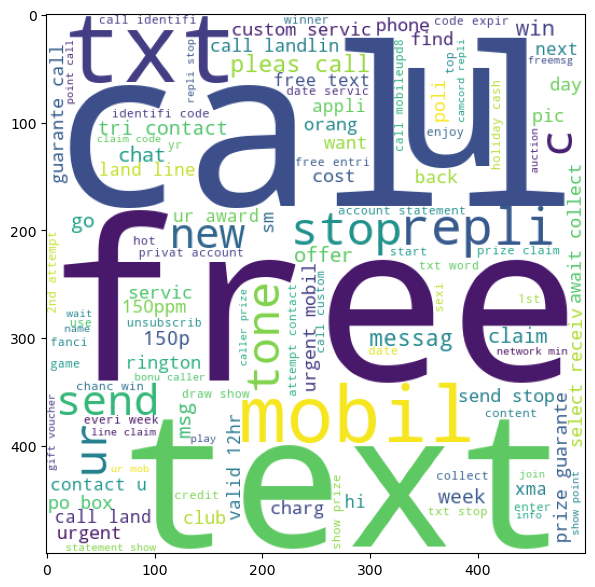

In [279]:
#Displays the spam messages wordcloud as image
plt.figure(figsize=(12,7))
plt.imshow(spam_wrdcloud)

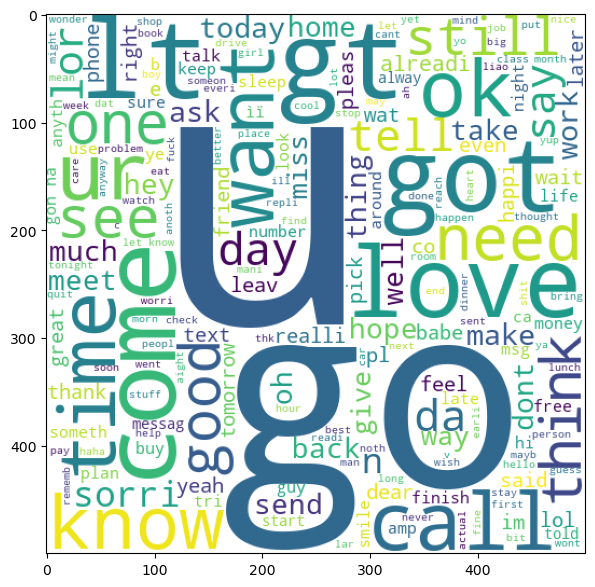

In [280]:
#Generating wordcloud for ham messages
ham_wrdcloud = wc.generate(df[df['category']==0]['transformed_textmessage'].str.cat(sep=" "))

#Displays the spam messages wordcloud as image
plt.figure(figsize=(12,7))
plt.imshow(ham_wrdcloud)

##### Finding top 30 words used in ham and spam text messages

In [281]:
df.head()

,category,text_message,char_count,word_count,sentence_count,transformed_textmessage
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [282]:
#Importing module to count word frequencies
from collections import Counter

#Finding top 30 words for ham messages
ham_corpus = []
for msg in df[df['category']==0]['transformed_textmessage']:
    for word in msg.split():
        ham_corpus.append(word)
ham_wordcount = Counter(ham_corpus)
ham_topwords = ham_wordcount.most_common(30)

#Finding top 30 words for spam messages
spam_corpus = []
for msg in df[df['category']==1]['transformed_textmessage']:
    for word in msg.split():
        spam_corpus.append(word)
spam_wordcount = Counter(spam_corpus)
spam_topwords = spam_wordcount.most_common(30)

In [283]:
#Top 30 words in ham messages
ham_topwords

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

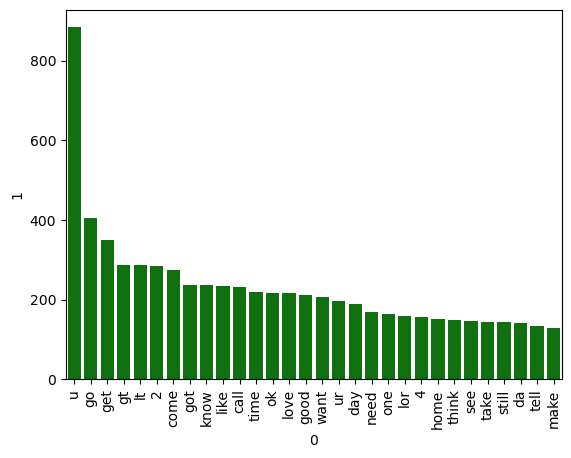

In [284]:
#Plotting the top 30 words in ham messages on barplot
sns.barplot(x=pd.DataFrame(ham_topwords)[0], y=pd.DataFrame(ham_topwords)[1], color='green')
plt.xticks(rotation='vertical')
plt.show()

The plot shows the top most commonly occuring words in the ham text messages.

In [285]:
#Top 30 words in spam messages
spam_topwords

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

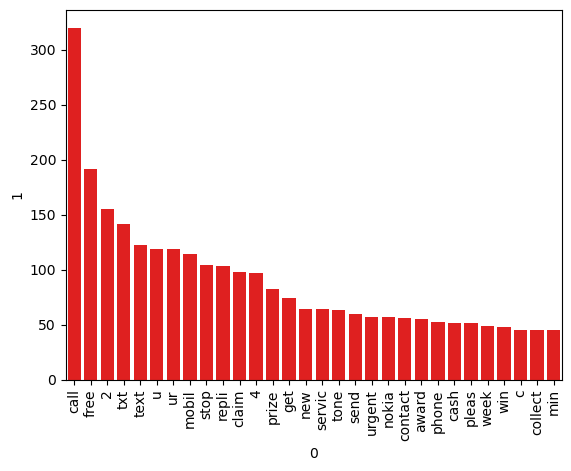

In [286]:
#Plotting the top 30 words in spam messages on barplot
sns.barplot(x=pd.DataFrame(spam_topwords)[0], y=pd.DataFrame(spam_topwords)[1], color='red')
plt.xticks(rotation='vertical')
plt.show()

The plot shows the top most commonly occuring words in the spam text messages.

#### 6. Model Building & Performance Evaluation

Text messages are made of words, but machine learning models cannot process raw text directly and hence they require numerical input. Vectorizing text (converting it into numerical representations) allows us to apply algorithms like Naïve Bayes, SVM, and Neural Networks which require numerical input. Converting text into vectors enables models to process and learn from textual data.

**>Vectorizing transformed_textmessage using 'Bag of Words'(BoW) text vectorization technique**

In [287]:
#Importing the required library for BoW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Converting text to Bag of Words Sparse Matrix
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_textmessage'])

#Converting Sparse matrix to dense array
X = X.toarray()

In [288]:
#Independent feature
X.shape

(5169, 6708)

There are 5169 SMS and 6708 unique words present in the corpus.

In [289]:
#For target feature
y = df['category'].values

In [290]:
y

array([0, 0, 1, ..., 0, 0, 0])

**>Train-Test Split**

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Naive Bayes Algorithm

In [292]:
#Importing different variants of Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

#Importing libraries for model's performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [293]:
#Creating objects
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [294]:
#Training the Gaussian Naive Bayes model
gnb.fit(X_train,y_train)

#Testing the model
y_pred_gnb = gnb.predict(X_test)

In [295]:
#Checking the Gaussian Naive Bayes model's performance metrics
print("Accuracy of the Gaussian Naive Bayes Model is ", accuracy_score(y_test, y_pred_gnb))
print("Precision of the Gaussian Naive Bayes Model is ", precision_score(y_test, y_pred_gnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_gnb))

Accuracy of the Gaussian Naive Bayes Model is  0.8800773694390716
Precision of the Gaussian Naive Bayes Model is  0.5315315315315315
Confusion matrix - 
 [[792 104]
 [ 20 118]]


As we can see that the GaussiaN Naive Bayes model has a very low precision score and thus this model can't be used as it can't identify well the spam messages. As our dataset is imbalanced, the accuracy doesn't matter much rather the Precision matters so that the model has minimum False Positives.

In [296]:
#Training the Multinomial Naive Bayes model
mnb.fit(X_train,y_train)

#Testing the model
y_pred_mnb = mnb.predict(X_test)

#Checking the Multinomial Naive Bayes model's performance metrics
print("Accuracy of the Multinomial Naive Bayes Model is ", accuracy_score(y_test, y_pred_mnb))
print("Precision of the Multinomial Naive Bayes Model is ", precision_score(y_test, y_pred_mnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_mnb))

Accuracy of the Multinomial Naive Bayes Model is  0.9642166344294004
Precision of the Multinomial Naive Bayes Model is  0.8344370860927153
Confusion matrix - 
 [[871  25]
 [ 12 126]]


The Multinomial Naive Bayes Model is performing better than the Gaussian Naive Bayes Model.

In [297]:
##############
#TEST 1
try:
    check_is_fitted(mnb)
    print("Model is fitted.")
except:
    print("Model is NOT fitted.")

Model is fitted.


In [298]:
#Training the Bernoulli Naive Bayes model
bnb.fit(X_train,y_train)

#Testing the model
y_pred_bnb = bnb.predict(X_test)

#Checking the Bernoulli Naive Bayes model's performance metrics
print("Accuracy of the Bernoulli Naive Bayes Model is ", accuracy_score(y_test, y_pred_bnb))
print("Precision of the Bernoulli Naive Bayes Model is ", precision_score(y_test, y_pred_bnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_bnb))

Accuracy of the Bernoulli Naive Bayes Model is  0.9700193423597679
Precision of the Bernoulli Naive Bayes Model is  0.9734513274336283
Confusion matrix - 
 [[893   3]
 [ 28 110]]


The Bernoulli Naive Bayes Model has the best performance than the other two Naive Bayes Models.

**Now we will try vectorizing the text message using TF-IDF vectorization technique to see if this method helps in getting a better performance models.**

**>Vectorizing transformed_textmessage using 'TF-IDF' text vectorization technique**

In [299]:
#Creating TF-IDF Object
tfidf = TfidfVectorizer()

#Vectorizing the text message column
X = tfidf.fit_transform(df['transformed_textmessage'])

#Converting into dense array
X = X.toarray()

In [300]:
#Checking shape
X.shape

(5169, 6708)

There are 5169 SMS and 6708 unique words present in the corpus similar to BoW.

In [301]:
#Dependent Feature
y

array([0, 0, 1, ..., 0, 0, 0])

In [302]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [303]:
#Train-Test Split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [304]:
#Training the Gaussian Naive Bayes model
gnb.fit(X_train,y_train)

#Testing the model
y_pred_gnb = gnb.predict(X_test)

In [305]:
#Checking the Gaussian Naive Bayes model's performance metrics
print("Accuracy of the Gaussian Naive Bayes Model is ", accuracy_score(y_test, y_pred_gnb))
print("Precision of the Gaussian Naive Bayes Model is ", precision_score(y_test, y_pred_gnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_gnb))

Accuracy of the Gaussian Naive Bayes Model is  0.8762088974854932
Precision of the Gaussian Naive Bayes Model is  0.5231481481481481
Confusion matrix - 
 [[793 103]
 [ 25 113]]


The precision score is poor for the Gaussian Naive Bayes Model.

In [306]:
#Training the Multinomial Naive Bayes model
mnb.fit(X_train,y_train)

#Testing the model
y_pred_mnb = mnb.predict(X_test)

#Checking the Multinomial Naive Bayes model's performance metrics
print("Accuracy of the Multinomial Naive Bayes Model is ", accuracy_score(y_test, y_pred_mnb))
print("Precision of the Multinomial Naive Bayes Model is ", precision_score(y_test, y_pred_mnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_mnb))

Accuracy of the Multinomial Naive Bayes Model is  0.9593810444874274
Precision of the Multinomial Naive Bayes Model is  1.0
Confusion matrix - 
 [[896   0]
 [ 42  96]]


The precision score is 100% for the Multinomial Naive Bayes Model. This means that the model will not fail in classiying spam messages.

In [307]:
##############
#TEST 2
try:
    check_is_fitted(mnb)
    print("Model is fitted.")
except:
    print("Model is NOT fitted.")

Model is fitted.


In [308]:
#Training the Bernoulli Naive Bayes model
bnb.fit(X_train,y_train)

#Testing the model
y_pred_bnb = bnb.predict(X_test)

#Checking the Bernoulli Naive Bayes model's performance metrics
print("Accuracy of the Bernoulli Naive Bayes Model is ", accuracy_score(y_test, y_pred_bnb))
print("Precision of the Bernoulli Naive Bayes Model is ", precision_score(y_test, y_pred_bnb))
print("Confusion matrix - \n", confusion_matrix(y_test, y_pred_bnb))

Accuracy of the Bernoulli Naive Bayes Model is  0.9700193423597679
Precision of the Bernoulli Naive Bayes Model is  0.9734513274336283
Confusion matrix - 
 [[893   3]
 [ 28 110]]


The Bernoulli Naive Bayes model is also giving a very good accuracy and precision score; however, the precision score of Multinomial Naive Bayes Model is 100%.

**Conclusion:**  

Multinomial Naive Bayes Model trained on TF-IDF Vectorized data is the BEST performing model among all the above models.

##### Other Classification Models

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [310]:
#Creating each model's object
mnb = MultinomialNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
adb = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
ext = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [311]:
#Creating a dictionary holding each model object
classifiers = {'Naive_B' : mnb,
               'Log_R' : lr,
               'SVC' : svc,
               'DTree' : dt,
               'KNN' : knn,
               'RForest' : rf,
               'AdaBoost' : adb,
               'BgClass' : bc,
               'ETClass' : ext,
               'GBoost' : gb,
               'XGBClass' : xgb
            }

In [312]:
#Creating a function to handle training and testing of all the models
def train_test_func(clf, X_train, y_train, X_test, y_test):
    #Training the specific classification model on the training data
    clf.fit(X_train, y_train)

    #Testing the trained model
    y_pred = clf.predict(X_test)

    #Checking the performance metrics of the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [313]:
#Example
#train_test_func(svc, X_train, y_train, X_test, y_test)

In [314]:
#Calling the train_test_func function for all the models
accuracy_scores = []
precision_scores = []
    
for key, value in classifiers.items():
    curr_accuracy, curr_precision = train_test_func(value, X_train, y_train, X_test, y_test)
    print('Model ', key)
    print('Accuracy - ', curr_accuracy)
    print('Precision - ', curr_precision)
    
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

Model  Naive_B
Accuracy -  0.9593810444874274
Precision -  1.0
Model  Log_R
Accuracy -  0.9516441005802708
Precision -  0.94
Model  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
Model  DTree
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
Model  KNN
Accuracy -  0.9003868471953579
Precision -  1.0
Model  RForest
Accuracy -  0.971953578336557
Precision -  1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
Model  BgClass
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
Model  ETClass
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
Model  GBoost
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
Model  XGBClass
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [315]:
##############
#TEST 3
try:
    check_is_fitted(mnb)
    print("Model is fitted.")
except:
    print("Model is NOT fitted.")

Model is fitted.


In [316]:
#Storing the performance metrics for all the models in a dataframe
model_performance = pd.DataFrame({'Model_Name': classifiers.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores})

In [317]:
model_performance.sort_values('Precision', ascending=False)

,Model_Name,Accuracy,Precision
0,Naive_B,0.959381,1.000000
4,KNN,0.900387,1.000000
5,RForest,0.971954,1.000000
8,ETClass,0.972921,0.982456
2,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,XGBClass,0.972921,0.943548
1,Log_R,0.951644,0.940000
9,GBoost,0.952611,0.923810
7,BgClass,0.958414,0.862595


As we see, the best two models are **Random Forest** and **Multinomial Naive Bayes**. **Random Forest** is the BEST performing among all with higher accuracy and 100% precision.

#### 7. Hyperparameter Tuning

In [318]:
#Setting max_features parameter to 3000 and reduce the number of unique words from 6708
tfidf = TfidfVectorizer(max_features=3000)

#Vectorizing the text message column
X = tfidf.fit_transform(df['transformed_textmessage'])

#Converting into dense array
X = X.toarray()

In [319]:
X.shape

(5169, 3000)

In [320]:
#Target Fetaure
y

array([0, 0, 1, ..., 0, 0, 0])

In [321]:
#Train-Test Split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [339]:
#Creating each model's object
mnb = MultinomialNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
adb = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
ext = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [340]:
#Creating a dictionary holding each model object
classifiers = {'Naive_B' : mnb,
               'Log_R' : lr,
               'SVC' : svc,
               'DTree' : dt,
               'KNN' : knn,
               'RForest' : rf,
               'AdaBoost' : adb,
               'BgClass' : bc,
               'ETClass' : ext,
               'GBoost' : gb,
               'XGBClass' : xgb
            }

In [341]:
#Calling the train_test_func function for all the models
accuracy_scores = []
precision_scores = []
for key, value in classifiers.items():
    curr_accuracy, curr_precision = train_test_func(value, X_train, y_train, X_test, y_test)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [342]:
##############
#TEST 4
try:
    check_is_fitted(mnb)
    print("Model is fitted.")
except:
    print("Model is NOT fitted.")

Model is fitted.


In [343]:
#Storing the tuned metric scores in a temporary dataframe
temp_df = pd.DataFrame({'Model_Name': classifiers.keys(), 'Accuracy_Tuned': accuracy_scores, 'Precision_Tuned' : precision_scores})

In [344]:
temp_df

,Model_Name,Accuracy_Tuned,Precision_Tuned
0,Naive_B,0.970986,1.000000
1,Log_R,0.958414,0.970297
2,SVC,0.975822,0.974790
3,DTree,0.932302,0.833333
4,KNN,0.905222,1.000000
5,RForest,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgClass,0.958414,0.868217
8,ETClass,0.974855,0.974576
9,GBoost,0.946809,0.919192


In [345]:
#Merging the temp dataframe to the original dataframe containing the metric scores before hyperparameter tuning
model_performance.merge(temp_df, on='Model_Name').sort_values('Precision_Tuned', ascending=False)

,Model_Name,Accuracy,Precision,Accuracy_Tuned,Precision_Tuned
0,Naive_B,0.959381,1.000000,0.970986,1.000000
4,KNN,0.900387,1.000000,0.905222,1.000000
5,RForest,0.971954,1.000000,0.975822,0.982906
2,SVC,0.972921,0.974138,0.975822,0.974790
8,ETClass,0.972921,0.982456,0.974855,0.974576
1,Log_R,0.951644,0.940000,0.958414,0.970297
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
10,XGBClass,0.972921,0.943548,0.967118,0.926230
9,GBoost,0.952611,0.923810,0.946809,0.919192
7,BgClass,0.958414,0.862595,0.958414,0.868217


After hyperparamter tuning, we observe that **Naive Bayes** Model's accuracy has improved and the precision is intact at 100%. However, Random Forest's precision has reduced after tuning.

We will also do **scaling** to see if it improves the overall performance of the models.

In [346]:
#HyperParameter Tuning--
#Scaling the vectorized independent feature so that the value ranges between 0 and 1.
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#X = scaler.fit_transform(X)

After trying scaling the model's precision score went down a little and there was no significant imrovement on the accuracy score. So we we will not perform scaling on the feature.

In [347]:
df

,category,text_message,char_count,word_count,sentence_count,transformed_textmessage
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


**Voting Classifier**

A Voting Classifier is an ensemble learning technique that combines best performing different models (classifiers) to improve overall predictive performance. It makes final predictions based on the votes of individual models.

In [348]:
#Taking top 3 models obtained after tuning for voting classifier
#Multinomial Naive Bayes
mnb_ensemble = MultinomialNB()

#KNN
knn_ensemble = KNeighborsClassifier()

#Random Forest
rf_ensemble = RandomForestClassifier(n_estimators=50, random_state=2)

In [349]:
#Importing required module
from sklearn.ensemble import VotingClassifier

#Combining the models for voting classifier
voting = VotingClassifier(estimators=[('nb', mnb_ensemble), ('knn', knn_ensemble), ('rdf', rf_ensemble)], voting='soft')

#Training the combined model
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('knn', KNeighborsClassifier()),
                             ('rdf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [350]:
#Testing
y_pred = voting.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))

Accuracy is 0.9535783365570599
Precision is 1.0


Accuracy is 95% and Precision is 100%. This voting classifier model is unable to perform better than Naive Bayes.

**Stacking**

Now we will perform stacking technique to see if it yields an improved performance.

In [351]:
#Peforming Stacking
model_estimators = [('nb', mnb_ensemble), ('knn', knn_ensemble), ('rdf', rf_ensemble)]

#By default, SVC() does not output probabilities, which may not work well with stacking. To fix this, parameter probability=True is set.
final_model_estimator = SVC(probability=True)

In [352]:
from sklearn.ensemble import StackingClassifier
st_clf = StackingClassifier(estimators=model_estimators, final_estimator=final_model_estimator)

In [353]:
#Training on the training data 
st_clf.fit(X_train, y_train)

#Testing on test data
y_pred = st_clf.predict(X_test)

#Checking performance metrics
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))

Accuracy is 0.9816247582205029
Precision is 0.976


The accuracy and precision of the meta model in stacking is less than the tuned Multinomial Naive Bayes Model. So, after performing all the required hyperparameter tuning, we will proceed with the **Multinomial Naive Bayes** Model as our **FINAL** Model.

#### 8. Model Deployment using Streamlit

In [354]:
import pickle

In [355]:
##############
#TEST 5
try:
    check_is_fitted(mnb)
    print("Model is fitted.")
except:
    print("Model is NOT fitted.")

Model is fitted.


In [356]:
#Creating pickle files to save vectorizer and trained multinomial naive bayes model object. These files will be exported to streamlit for website creation.
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))